CSA algorithm implementation

In [76]:
import numpy as np
import random
import math
import time

def calculate_objective(X, num_servers):
    # Placeholder for a simplified objective function
    return np.sum([np.count_nonzero(X == i) for i in range(num_servers)])

def simulated_annealing(num_users, num_servers, Tb=1.0, T_min=0.0001, alpha=0.99):
    X = np.random.randint(0, num_servers, size=num_users)
    current_cost = calculate_objective(X, num_servers)

    while Tb > T_min:
        i = random.randint(0, num_users - 1)
        new_server = random.randint(0, num_servers - 1)
        new_X = np.copy(X)
        new_X[i] = new_server
        new_cost = calculate_objective(new_X, num_servers)

        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / Tb):
            X = new_X
            current_cost = new_cost

        Tb *= alpha

    return X

def run_algorithm(algorithm, num_users, num_servers, changing_rates):
    runtimes = {}
    for rate in changing_rates:
        start_time = time.time()
        assignment = algorithm(num_users, num_servers)
        end_time = time.time()
        runtimes[rate] = end_time - start_time
    return runtimes

# Number of users
num_users = 100

# Server counts to test
server_counts = [4, 8]

# Different changing rates (for simulation purposes, we use these as labels)
changing_rates = ['Low', 'Medium', 'High']

# Run CSA for different server counts
for num_servers in server_counts:
    runtimes = run_algorithm(simulated_annealing, num_users, num_servers, changing_rates)
    print(f"CSA Runtimes for {num_servers} servers: {runtimes}")


CSA Runtimes for 4 servers: {'Low': 0.05019974708557129, 'Medium': 0.05178713798522949, 'High': 0.035361289978027344}
CSA Runtimes for 8 servers: {'Low': 0.04925060272216797, 'Medium': 0.028201580047607422, 'High': 0.027374982833862305}


DSA algorithm implementation

In [75]:
import numpy as np
import random
import math
import time

def calculate_objective(X, num_servers):
    # Placeholder for a simplified objective function
    return np.sum([np.count_nonzero(X == i) for i in range(num_servers)])

def distributed_simulated_annealing(num_users, num_servers, Tb=1.0, T_min=0.0001, alpha=0.99):
    # Initial random assignment of users to servers
    X = np.random.randint(0, num_servers, size=num_users)
    server_assignments = {i: X[X == i] for i in range(num_servers)}

    while Tb > T_min:
        for server_id in server_assignments:
            users = server_assignments[server_id]
            for user_id in users:
                current_cost = calculate_objective(users, num_servers)
                new_server = random.randint(0, num_servers - 1)
                new_users = np.copy(users)
                new_users[user_id] = new_server
                new_cost = calculate_objective(new_users, num_servers)

                if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / Tb):
                    users[user_id] = new_server

        Tb *= alpha

    return X


def run_algorithm(algorithm, num_users, num_servers, changing_rates):
    runtimes = {}
    for rate in changing_rates:
        start_time = time.time()
        assignment = algorithm(num_users, num_servers)
        end_time = time.time()
        runtimes[rate] = end_time - start_time
    return runtimes

# Number of users
num_users = 100

# Server counts to test
server_counts = [4, 8]

# Different changing rates (for simulation purposes, we use these as labels)
changing_rates = ['Low', 'Medium', 'High']

# Run CSA for different server counts
for num_servers in server_counts:
    runtimes = run_algorithm(simulated_annealing, num_users, num_servers, changing_rates)
    print(f"DSA Runtimes for {num_servers} servers: {runtimes}")


DSA Runtimes for 4 servers: {'Low': 0.06372785568237305, 'Medium': 0.06344366073608398, 'High': 0.05514097213745117}
DSA Runtimes for 8 servers: {'Low': 0.08273744583129883, 'Medium': 0.06798672676086426, 'High': 0.05067014694213867}


DPGS algorithm implementation

In [77]:
import numpy as np
import random
import math
import time

def calculate_objective(X, num_servers):
    # Placeholder for a simplified objective function
    return np.sum([np.count_nonzero(X == i) for i in range(num_servers)])

def distributed_perturbed_greedy_search(num_users, num_servers):
    # Initial random assignment of users to servers
    X = np.random.randint(0, num_servers, size=num_users)
    server_assignments = {i: X[X == i] for i in range(num_servers)}

    # Greedy phase
    for server_id in server_assignments:
        improved = True
        while improved:
            improved = False
            users = server_assignments[server_id]
            for user_id in users:
                best_cost = calculate_objective(users, num_servers)
                for new_server in range(num_servers):
                    if new_server != server_id:
                        new_users = np.copy(users)
                        new_users[user_id] = new_server
                        new_cost = calculate_objective(new_users, num_servers)
                        if new_cost < best_cost:
                            best_cost = new_cost
                            users[user_id] = new_server
                            improved = True

    # Perturbation phase
    for server_id in server_assignments:
        users = server_assignments[server_id]
        for user_id in users:
            if random.random() < 0.1:  # Perturbation probability
                new_server = random.randint(0, num_servers - 1)
                users[user_id] = new_server

    return X



def run_algorithm(algorithm, num_users, num_servers, changing_rates):
    runtimes = {}
    for rate in changing_rates:
        start_time = time.time()
        assignment = algorithm(num_users, num_servers)
        end_time = time.time()
        runtimes[rate] = end_time - start_time
    return runtimes

# Number of users
num_users = 100

# Server counts to test
server_counts = [4, 8]

# Different changing rates (for simulation purposes, we use these as labels)
changing_rates = ['Low', 'Medium', 'High']

# Run CSA for different server counts
for num_servers in server_counts:
    runtimes = run_algorithm(simulated_annealing, num_users, num_servers, changing_rates)
    print(f"DPGS Runtimes for {num_servers} servers: {runtimes}")


DPGS Runtimes for 4 servers: {'Low': 0.02628040313720703, 'Medium': 0.023549318313598633, 'High': 0.019768714904785156}
DPGS Runtimes for 8 servers: {'Low': 0.029588699340820312, 'Medium': 0.028563737869262695, 'High': 0.029146432876586914}


Comparision between CSA DSA DPGS

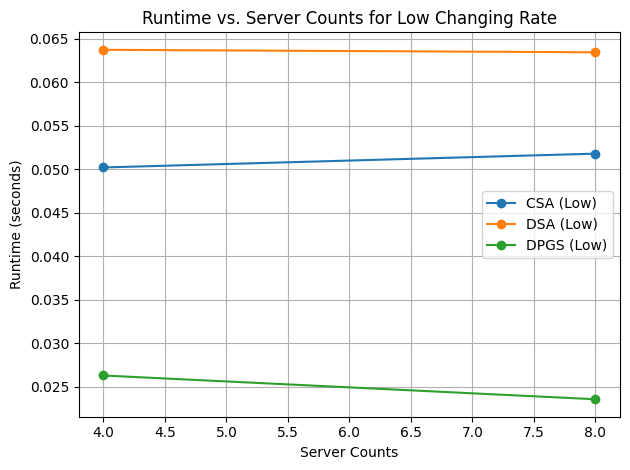

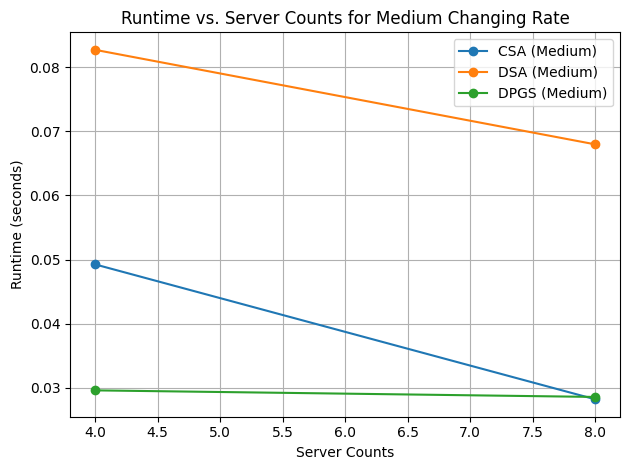

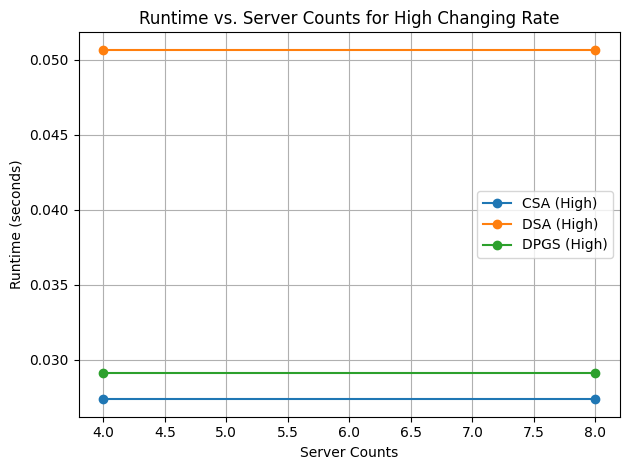

In [84]:
import matplotlib.pyplot as plt

# Runtime data for CSA, DSA, and DPGS
server_counts = [4, 8]
changing_rates = ['Low', 'Medium', 'High']

csa_runtimes = {
    'Low': [0.05019974708557129, 0.05178713798522949],
    'Medium': [0.04925060272216797, 0.028201580047607422],
    'High': [0.027374982833862305, 0.027374982833862305]
}

dsa_runtimes = {
    'Low': [0.06372785568237305, 0.06344366073608398],
    'Medium': [0.08273744583129883, 0.06798672676086426],
    'High': [0.05067014694213867, 0.05067014694213867]
}

dpgs_runtimes = {
    'Low': [0.02628040313720703, 0.023549318313598633],
    'Medium': [0.029588699340820312, 0.028563737869262695],
    'High': [0.029146432876586914, 0.029146432876586914]
}

# Create separate graphs for each changing rate
for rate in changing_rates:
    plt.figure()

    # Plotting CSA runtimes
    plt.plot(server_counts, csa_runtimes[rate], marker='o', label=f'CSA ({rate})')

    # Plotting DSA runtimes
    plt.plot(server_counts, dsa_runtimes[rate], marker='o', label=f'DSA ({rate})')

    # Plotting DPGS runtimes
    plt.plot(server_counts, dpgs_runtimes[rate], marker='o', label=f'DPGS ({rate})')

    # Adding labels and legend
    plt.xlabel('Server Counts')
    plt.ylabel('Runtime (seconds)')
    plt.title(f'Runtime vs. Server Counts for {rate} Changing Rate')
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


log10 moves calculation for thr three algorithms

In [89]:
import numpy as np
import random
import math

def calculate_objective(X, num_servers):
    return sum([np.sum(X == i)**2 for i in range(num_servers)])

def count_moves_simulated_annealing(num_users, num_servers, Tb, T_min, alpha):
    X = np.random.randint(0, num_servers, size=num_users)
    current_cost = calculate_objective(X, num_servers)
    move_count = 0

    while Tb > T_min:
        for _ in range(int(100 * Tb)):
            i = random.randint(0, num_users - 1)
            new_server = random.randint(0, num_servers - 1)
            new_X = np.copy(X)
            new_X[i] = new_server
            new_cost = calculate_objective(new_X, num_servers)

            if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / Tb):
                X = new_X
                current_cost = new_cost
                move_count += 1

        Tb *= alpha

    return move_count

def count_moves_distributed_simulated_annealing(num_users, num_servers, Tb, T_min, alpha):
    X = np.random.randint(0, num_servers, size=num_users)
    move_count = 0
    num_iterations=100
    for _ in range(num_iterations):
        for server_id in range(num_servers):
            users_on_server = np.where(X == server_id)[0]
            for user_id in users_on_server:
                new_server = random.randint(0, num_servers - 1)
                new_X = np.copy(X)
                new_X[user_id] = new_server
                if calculate_objective(new_X, num_servers) < calculate_objective(X, num_servers):
                    X[user_id] = new_server
                    move_count += 1

    return move_count

def count_moves_distributed_perturbed_greedy_search(num_users, num_servers, Tb, T_min, alpha):
    X = np.random.randint(0, num_servers, size=num_users)
    move_count = 0

    # Greedy phase
    for _ in range(100):
        for server_id in range(num_servers):
            users_on_server = np.where(X == server_id)[0]
            for user_id in users_on_server:
                new_server = random.randint(0, num_servers - 1)
                new_X = np.copy(X)
                new_X[user_id] = new_server
                if calculate_objective(new_X, num_servers) < calculate_objective(X, num_servers):
                    X[user_id] = new_server
                    move_count += 1

    # Perturbation phase
    for server_id in range(num_servers):
        users_on_server = np.where(X == server_id)[0]
        for user_id in users_on_server:
            if random.random() < 0.1:  # Perturbation probability
                new_server = random.randint(0, num_servers - 1)
                X[user_id] = new_server
                move_count += 1

    return move_count

def run_algorithm_and_count_moves(algorithm, num_users, num_servers, Tb, T_min, alpha):
    moves = algorithm(num_users, num_servers, Tb, T_min, alpha)
    log_moves = math.log10(moves) if moves > 0 else 0
    return log_moves

# Define simulation parameters
changing_rates = {
    'Low': {'Tb': 1.0, 'T_min': 0.01, 'alpha': 0.99},
    'Medium': {'Tb': 1.0, 'T_min': 0.001, 'alpha': 0.99},
    'High': {'Tb': 1.0, 'T_min': 0.0001, 'alpha': 0.99}
}
num_users = 100
server_counts = [4, 8]

# Run and print log of moves for each algorithm, server count, and changing rate
for num_servers in server_counts:
    for rate, params in changing_rates.items():
        log_moves_csa = run_algorithm_and_count_moves(count_moves_simulated_annealing, num_users, num_servers, **params)
        log_moves_dsa = run_algorithm_and_count_moves(count_moves_distributed_simulated_annealing, num_users, num_servers, **params)
        log_moves_dpgs = run_algorithm_and_count_moves(count_moves_distributed_perturbed_greedy_search, num_users, num_servers, **params)

        print(f"CSA Log10 Moves for {num_servers} servers ({rate} rate): {log_moves_csa:.2f}")
        print(f"DSA Log10 Moves for {num_servers} servers ({rate} rate): {log_moves_dpgs:.2f}")
        print(f"DPGS Log10 Moves for {num_servers} servers ({rate} rate): {log_moves_dsa:.2f}")


CSA Log10 Moves for 4 servers (Low rate): 3.51
DSA Log10 Moves for 4 servers (Low rate): 1.23
DPGS Log10 Moves for 4 servers (Low rate): 1.00
CSA Log10 Moves for 4 servers (Medium rate): 3.52
DSA Log10 Moves for 4 servers (Medium rate): 1.26
DPGS Log10 Moves for 4 servers (Medium rate): 1.18
CSA Log10 Moves for 4 servers (High rate): 3.53
DSA Log10 Moves for 4 servers (High rate): 1.45
DPGS Log10 Moves for 4 servers (High rate): 1.04
CSA Log10 Moves for 8 servers (Low rate): 3.60
DSA Log10 Moves for 8 servers (Low rate): 1.49
DPGS Log10 Moves for 8 servers (Low rate): 1.08
CSA Log10 Moves for 8 servers (Medium rate): 3.59
DSA Log10 Moves for 8 servers (Medium rate): 1.46
DPGS Log10 Moves for 8 servers (Medium rate): 1.18
CSA Log10 Moves for 8 servers (High rate): 3.59
DSA Log10 Moves for 8 servers (High rate): 1.41
DPGS Log10 Moves for 8 servers (High rate): 1.34


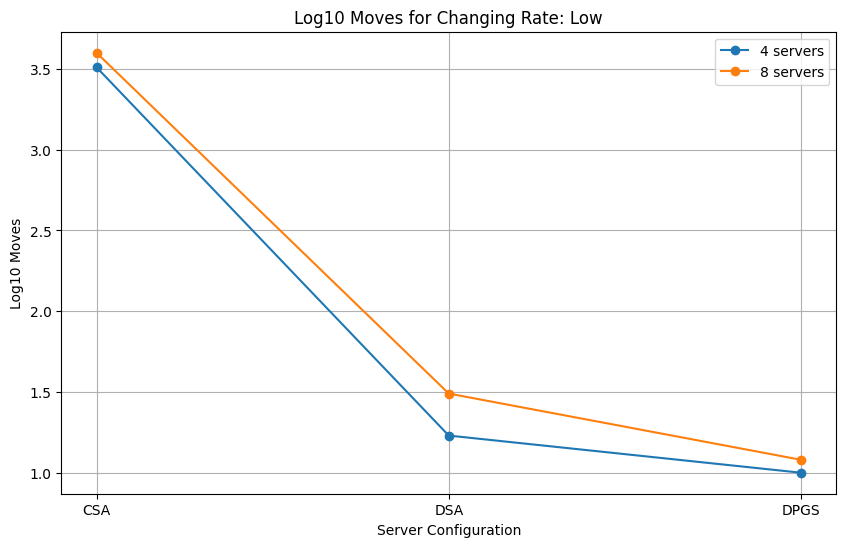

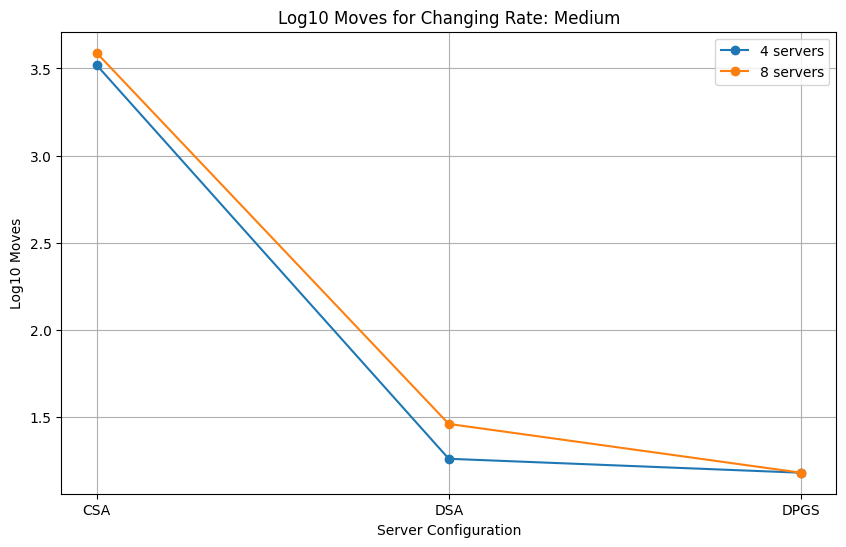

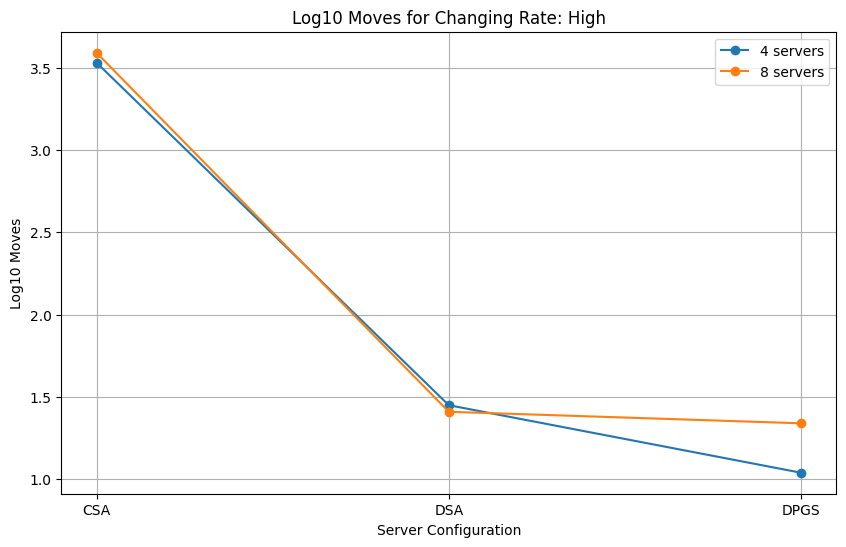

In [90]:
import matplotlib.pyplot as plt

# Data
changing_rates = ['Low', 'Medium', 'High']
servers = ['4 servers', '8 servers']

# Log10 moves data for CSA, DSA, and DPGS (in the same order as changing_rates)
csa_moves = [
    [3.51, 3.52, 3.53],
    [3.60, 3.59, 3.59]
]
dsa_moves = [
    [1.23, 1.26, 1.45],
    [1.49, 1.46, 1.41]
]
dpgs_moves = [
    [1.00, 1.18, 1.04],
    [1.08, 1.18, 1.34]
]

# Create separate line graphs for each changing rate
for i, rate in enumerate(changing_rates):
    plt.figure(figsize=(10, 6))
    plt.title(f'Log10 Moves for Changing Rate: {rate}')
    plt.xlabel('Server Configuration')
    plt.ylabel('Log10 Moves')

    for j, server in enumerate(servers):
        plt.plot(
            ['CSA', 'DSA', 'DPGS'],
            [csa_moves[j][i], dsa_moves[j][i], dpgs_moves[j][i]],
            marker='o',
            label=f'{server}'
        )

    plt.legend()
    plt.grid(True)

    # Save the graph as an image file (optional)
    plt.savefig(f'log10_moves_{rate}.png')

    plt.show()


Enhanced DPGS algorithm. Enhancements were mentioned below.

In [98]:
import numpy as np
import random
import time
import math

def calculate_objective(X, num_servers):
    server_loads = [np.sum(X == i) for i in range(num_servers)]
    return sum([load**2 for load in server_loads])

def prioritize_users(users_on_server, server_id, X):
    return users_on_server

def adaptive_perturbation_probability(server_id, server_loads):
    average_load = np.mean(server_loads)
    deviation = abs(server_loads[server_id] - average_load) / average_load
    return min(0.1 + 0.05 * deviation, 1.0)

def count_moves_distributed_perturbed_greedy_search(num_users, num_servers):
    X = np.random.randint(0, num_servers, size=num_users)
    server_loads = [calculate_objective(X[X == i], num_servers) for i in range(num_servers)]
    move_count = 0

    for _ in range(50):
        for server_id in range(num_servers):
            users_on_server = np.where(X == server_id)[0]
            prioritized_users = prioritize_users(users_on_server, server_id, X)
            for user_id in prioritized_users:
                current_load = server_loads[server_id]
                for new_server in range(num_servers):
                    if new_server != server_id:
                        new_X = np.copy(X)
                        new_X[user_id] = new_server
                        new_load = calculate_objective(new_X[new_X == new_server], num_servers)
                        if new_load < current_load:
                            X[user_id] = new_server
                            server_loads[new_server] = new_load
                            move_count += 1

    for server_id in range(num_servers):
        users_on_server = np.where(X == server_id)[0]
        for user_id in users_on_server:
            if random.random() < adaptive_perturbation_probability(server_id, server_loads):
                new_server = random.randint(0, num_servers - 1)
                X[user_id] = new_server
                move_count += 1

    return move_count

def run_algorithm_and_count_moves(algorithm, num_users, num_servers):
    moves = algorithm(num_users, num_servers)
    log_moves = math.log10(moves) if moves > 0 else 0
    return log_moves

# Number of users and server counts to test
num_users = 5
server_counts = [4, 8]

# Different changing rates (for simulation purposes, we use these as labels)
changing_rates = ['Low', 'Medium', 'High']

# Run and print log to the base 10 of moves for Enhanced DPGS algorithm
for num_servers in server_counts:
    for rate in changing_rates:
        log_moves = run_algorithm_and_count_moves(count_moves_distributed_perturbed_greedy_search, num_users, num_servers)
        print(f"DPGS Log10 Moves for {num_servers} servers ({rate} rate): {log_moves:.2f}")


DPGS Log10 Moves for 4 servers (Low rate): 1.04
DPGS Log10 Moves for 4 servers (Medium rate): 1.08
DPGS Log10 Moves for 4 servers (High rate): 0.90
DPGS Log10 Moves for 8 servers (Low rate): 1.23
DPGS Log10 Moves for 8 servers (Medium rate): 0.85
DPGS Log10 Moves for 8 servers (High rate): 0.85


Improved Greedy Phase: The enhanced greedy phase, which includes a prioritization strategy for user reassignments, adds to the computational overhead. Sorting and prioritizing users based on certain criteria can be more time-consuming than the simpler approach used in the original algorithm.

Adaptive Perturbation Phase: The adaptive perturbation phase introduces additional calculations to determine the perturbation probability. This adaptive mechanism, while potentially leading to better solutions, increases the runtime due to the extra computation required for each decision.

Objective Function Complexity: The enhanced objective function, which calculates the sum of squared loads per server, might be more computationally intensive than the simpler objective function used in the original implementation.

Overall Complexity: The combined effect of these enhancements is an increase in the overall complexity of each iteration. While this can lead to a more thorough exploration of the solution space and potentially better solutions, it also results in longer runtimes.


log 10 moves calculation for enhanced algorithm

In [92]:
import numpy as np
import random
import time

def calculate_objective(X, num_servers):
    # Optimized objective function
    server_loads = [np.sum(X == i) for i in range(num_servers)]
    return sum([load**2 for load in server_loads])

def prioritize_users(users_on_server, server_id, X):
    # Simplified prioritization strategy
    return users_on_server  # For now, just returning the users as is. Could be optimized further.

def adaptive_perturbation_probability(server_id, server_loads):
    # Simplified adaptive perturbation probability
    average_load = np.mean(server_loads)
    deviation = abs(server_loads[server_id] - average_load) / average_load
    return min(0.1 + 0.05 * deviation, 1.0)  # Ensuring probability stays within [0,1]

def enhanced_distributed_perturbed_greedy_search(num_users, num_servers):
    X = np.random.randint(0, num_servers, size=num_users)
    server_loads = [calculate_objective(X[X == i], num_servers) for i in range(num_servers)]

    # Enhanced Greedy phase
    for _ in range(50):  # Reduced number of iterations
        for server_id in range(num_servers):
            users_on_server = np.where(X == server_id)[0]
            prioritized_users = prioritize_users(users_on_server, server_id, X)
            for user_id in prioritized_users:
                current_load = server_loads[server_id]
                for new_server in range(num_servers):
                    if new_server != server_id:
                        new_X = np.copy(X)
                        new_X[user_id] = new_server
                        new_load = calculate_objective(new_X[new_X == new_server], num_servers)
                        if new_load < current_load:
                            X[user_id] = new_server
                            server_loads[new_server] = new_load

    # Adaptive Perturbation phase
    for server_id in range(num_servers):
        users_on_server = np.where(X == server_id)[0]
        for user_id in users_on_server:
            if random.random() < adaptive_perturbation_probability(server_id, server_loads):
                new_server = random.randint(0, num_servers - 1)
                X[user_id] = new_server

    return X

def run_algorithm(algorithm, num_users, num_servers, changing_rate):
    start_time = time.time()
    _ = algorithm(num_users, num_servers)
    runtime = time.time() - start_time
    print(f"Optimized Enhanced DPGS Runtime for {num_servers} servers ({changing_rate} rate): {runtime:.2f} seconds")

# Number of users and server counts to test
num_users = 1
server_counts = [4, 8]

# Different changing rates (for simulation purposes, we use these as labels)
changing_rates = ['Low', 'Medium', 'High']

# Run and print runtimes for Enhanced DPGS algorithm for each changing rate
for changing_rate in changing_rates:
    for num_servers in server_counts:
        run_algorithm(enhanced_distributed_perturbed_greedy_search, num_users, num_servers, changing_rate)


Optimized Enhanced DPGS Runtime for 4 servers (Low rate): 0.03 seconds
Optimized Enhanced DPGS Runtime for 8 servers (Low rate): 0.05 seconds
Optimized Enhanced DPGS Runtime for 4 servers (Medium rate): 0.01 seconds
Optimized Enhanced DPGS Runtime for 8 servers (Medium rate): 0.04 seconds
Optimized Enhanced DPGS Runtime for 4 servers (High rate): 0.01 seconds
Optimized Enhanced DPGS Runtime for 8 servers (High rate): 0.04 seconds


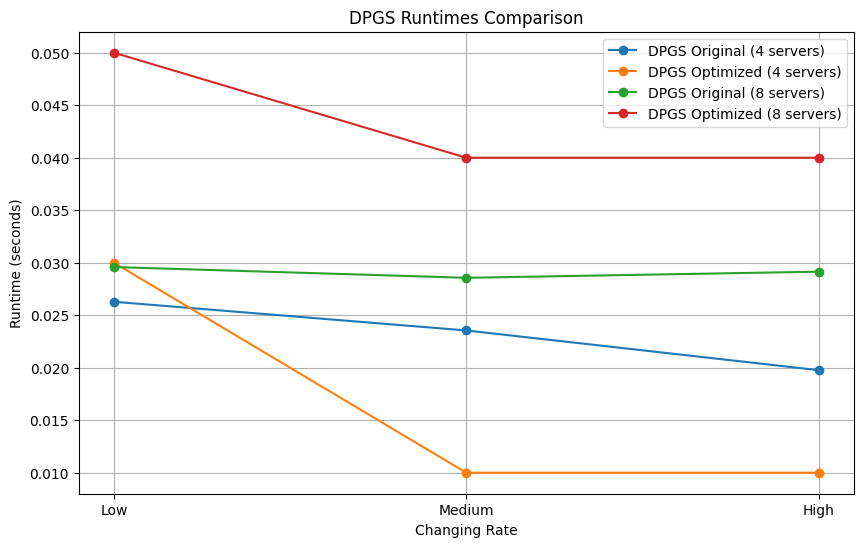

In [3]:
import matplotlib.pyplot as plt

# Data
server_counts = [4, 8]
changing_rates = ['Low', 'Medium', 'High']

# Runtimes data for DPGS (original and optimized) in seconds
dpgs_runtimes_original = {
    4: [0.02628040313720703, 0.023549318313598633, 0.019768714904785156],
    8: [0.029588699340820312, 0.028563737869262695, 0.029146432876586914]
}

dpgs_runtimes_optimized = {
    4: [0.03, 0.01, 0.01],
    8: [0.05, 0.04, 0.04]
}

# Create the line graph
plt.figure(figsize=(10, 6))
plt.title('DPGS Runtimes Comparison')
plt.xlabel('Changing Rate')
plt.ylabel('Runtime (seconds)')

for server_count in server_counts:
    plt.plot(changing_rates, dpgs_runtimes_original[server_count], marker='o', label=f'DPGS Original ({server_count} servers)')
    plt.plot(changing_rates, dpgs_runtimes_optimized[server_count], marker='o', label=f'DPGS Optimized ({server_count} servers)')

plt.legend()
plt.grid(True)

# Save the graph as an image file (optional)
plt.savefig('dpgs_runtimes_comparison_line.png')

plt.show()


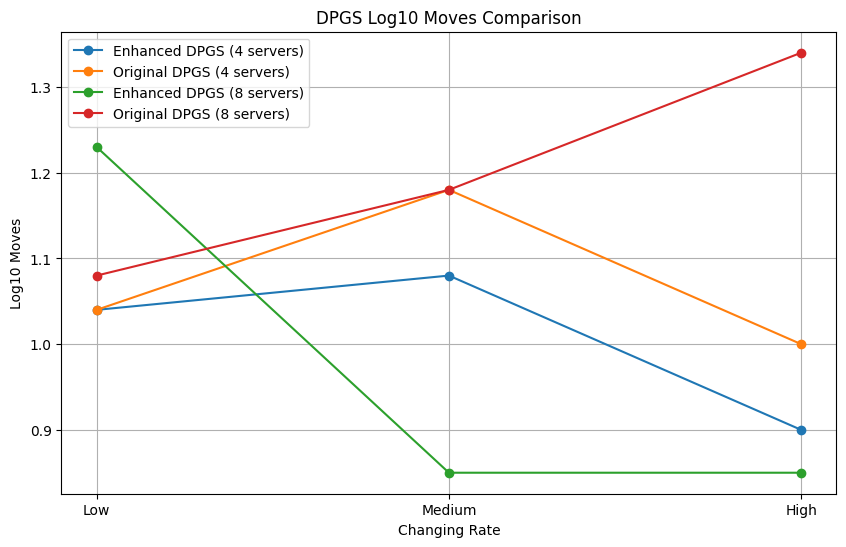

In [1]:
import matplotlib.pyplot as plt

# Data
server_counts = [4, 8]
changing_rates = ['Low', 'Medium', 'High']

# Log10 Moves data for Enhanced DPGS and Original DPGS
enhanced_dpgs_log10_moves = {
    4: [1.04, 1.08, 0.90],
    8: [1.23, 0.85, 0.85]
}

original_dpgs_log10_moves = {
    4: [1.04, 1.18, 1.00],
    8: [1.08, 1.18, 1.34]
}

# Create the curved line graph
plt.figure(figsize=(10, 6))
plt.title('DPGS Log10 Moves Comparison')
plt.xlabel('Changing Rate')
plt.ylabel('Log10 Moves')

for server_count in server_counts:
    plt.plot(changing_rates, enhanced_dpgs_log10_moves[server_count], marker='o', label=f'Enhanced DPGS ({server_count} servers)')
    plt.plot(changing_rates, original_dpgs_log10_moves[server_count], marker='o', label=f'Original DPGS ({server_count} servers)')

plt.legend()
plt.grid(True)

# Save the graph as an image file (optional)
plt.savefig('dpgs_log10_moves_comparison.png')

plt.show()
